In [20]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)

In [3]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
128,47,M,LOW,NORMAL,33.542,drugY
32,49,M,LOW,NORMAL,11.014,drugX
0,23,F,HIGH,HIGH,25.355,drugY
124,53,F,HIGH,NORMAL,12.495,drugB
119,61,F,HIGH,HIGH,25.475,drugY
84,47,F,LOW,HIGH,10.067,drugC
199,40,F,LOW,NORMAL,11.349,drugX
129,32,F,NORMAL,HIGH,7.477,drugX
193,72,M,LOW,HIGH,6.769,drugC
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
163,21,0,0,1,28.632,drugY
33,65,0,0,1,31.876,drugY
167,57,0,2,0,14.216,drugX
143,74,1,0,1,15.436,drugY
173,41,0,1,1,18.739,drugY
117,40,0,2,0,10.103,drugX
115,51,1,0,0,18.295,drugY
54,68,0,0,1,10.189,drugB
197,52,1,2,0,9.894,drugX
106,22,1,2,0,11.953,drugX


In [5]:
X = df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
X[0:5]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043]])

In [6]:
y = df['Drug'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

In [8]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
y_predict = tree_model.predict(X_test)

In [10]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [11]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

NameError: name 'metrics' is not defined

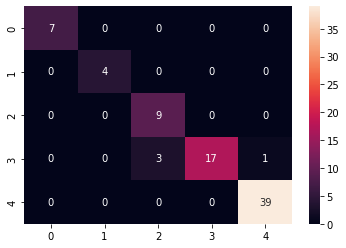

In [12]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [13]:
predict = cross_val_predict(estimator = tree_model, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



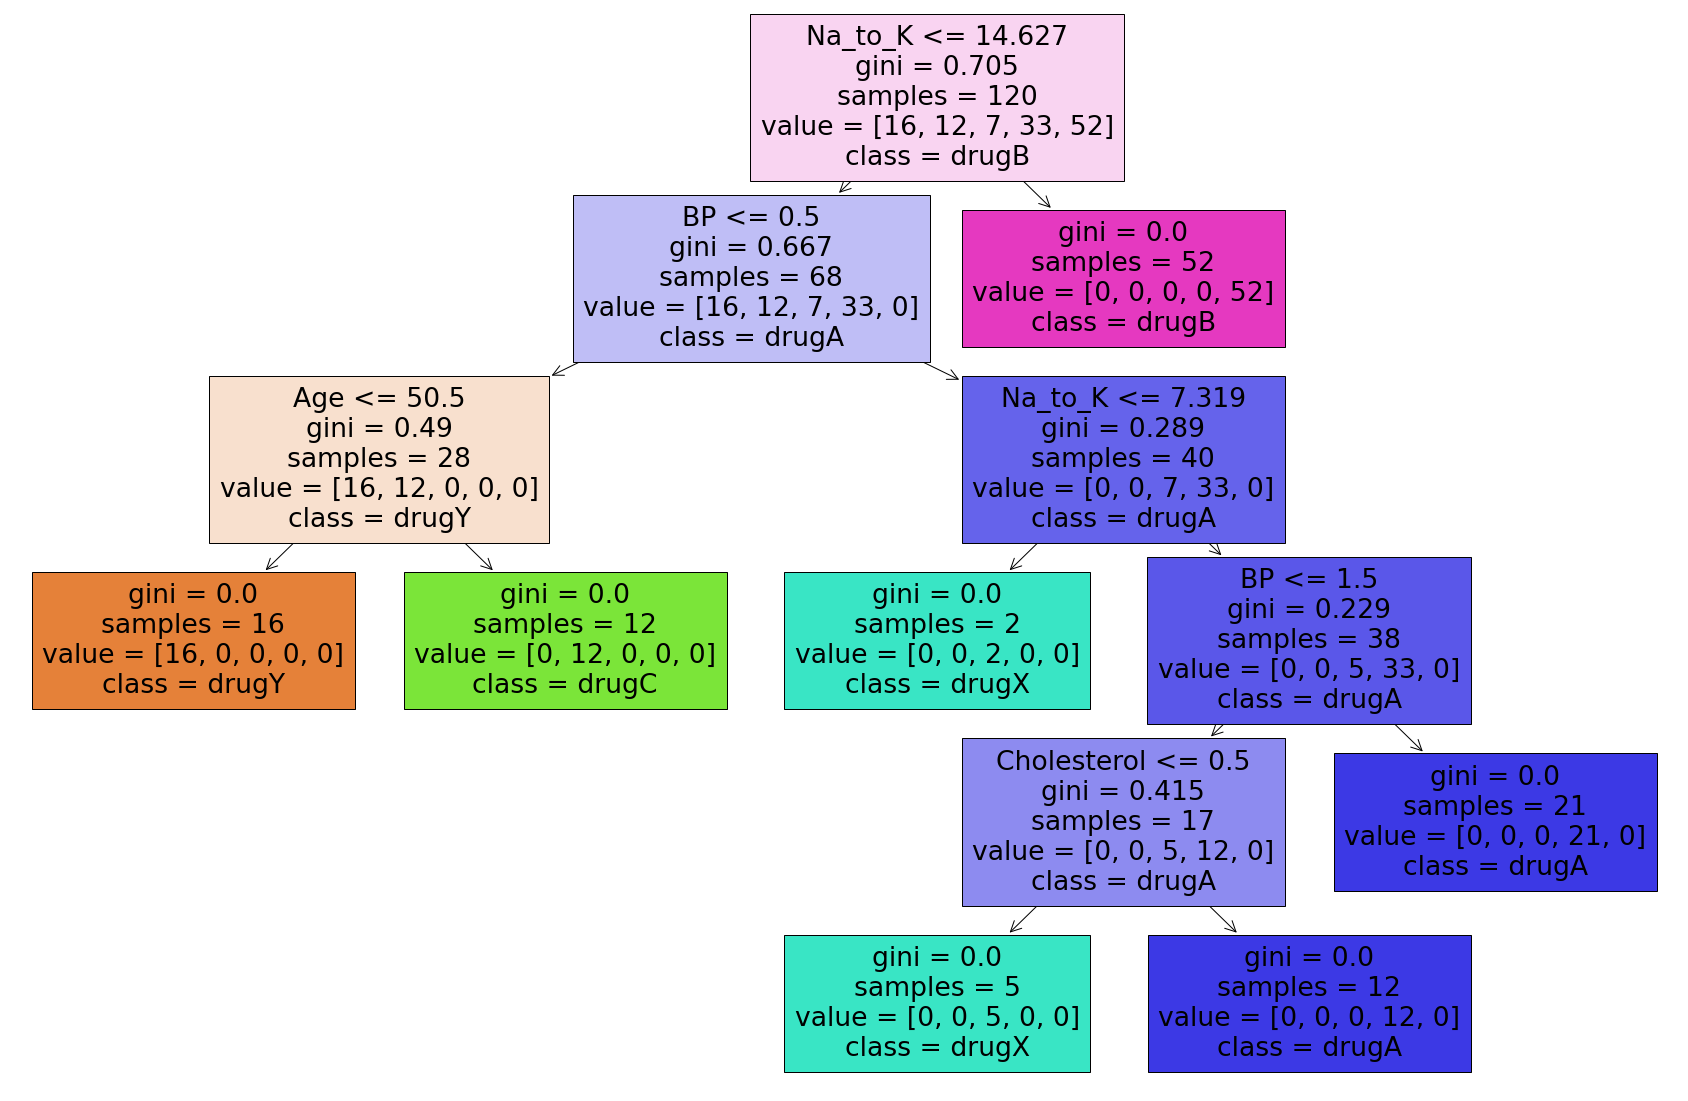

In [14]:
cols = df.drop('Drug', axis=1).columns
classes = df['Drug'].unique()

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes,filled=True)
plt.show()

In [18]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.01)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

NameError: name 'metrics' is not defined

In [21]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.0, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

NameError: name 'metrics' is not defined

In [22]:
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      0.78      0.88         9
       drugX       0.91      0.95      0.93        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.96        80
   macro avg       0.98      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



In [23]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

NameError: name 'metrics' is not defined